## Taller de extracción de datos: UN Comtrade API

1. Entrar al siguiente link y registrarse con una cuenta de Google: https://comtradedeveloper.un.org/signin?returnUrl=%2F
2. Una vez registrado, se va a la sección de "Products" -> "Free APIs"
3. Se crea un nombre para la suscripción que será gratis:
    

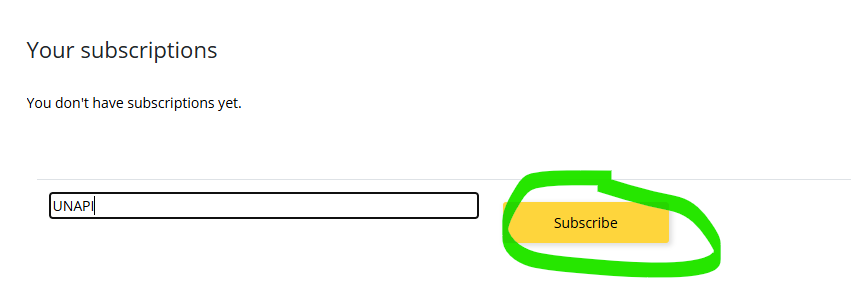

4. Con la suscripción creada ya se puede obtener una llave para acceder a los datos de comercio internacional, en este caso se va a usar la primary key:

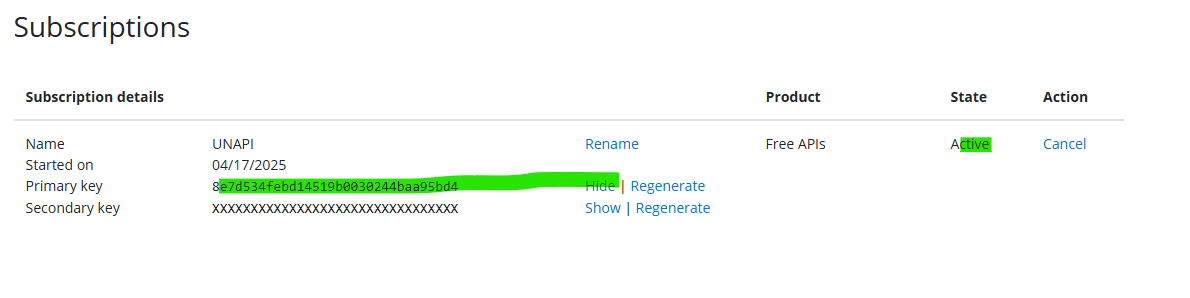

5. Explorar la documentación de la librería de UN Comtrade API Package para entender sus funciones, clases y criterios de selección de las consultas:
    - https://pypi.org/project/comtradeapicall/
    - https://github.com/uncomtrade/comtradeapicall

## Librerías

In [1]:
# Librerías
import comtradeapicall

## Parámetros

In [2]:
# Llave secreta
subscription_key = '8e7d534febd14519b0030244baa95bd4' 

## Ejemplos de uso

In [3]:
# Ejemplo: Importaciones de Australia (reporterCode = 36) del código 91 en modo
# clásico (“classic”) para mayo 2022 (period = 202205).
mydf = comtradeapicall.previewFinalData(
    typeCode='C',   # 'C' = mercancías
    freqCode='M',   # Frecuencia mensual
    clCode='HS',    # Clasificación HS
    period='202205',
    reporterCode='36',
    cmdCode='91',
    flowCode='M',   # 'M' = importaciones
    partnerCode=None, partner2Code=None,
    customsCode=None, motCode=None,
    maxRecords=500,
    format_output='JSON',
    aggregateBy=None,
    breakdownMode='classic',
    countOnly=None,
    includeDesc=True  # Incluir descripciones
)
mydf.head(5)

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20220501,2022,5,202205,36,AUS,Australia,M,...,0.0,False,0.0,False,6.735064e+07,6.642209e+07,6.735064e+07,0,False,True
1,C,M,20220501,2022,5,202205,36,AUS,Australia,M,...,0.0,False,0.0,False,8.208810e+02,7.800080e+02,8.208810e+02,0,False,True
2,C,M,20220501,2022,5,202205,36,AUS,Australia,M,...,0.0,False,0.0,False,2.605931e+05,2.599554e+05,2.605931e+05,0,False,True
3,C,M,20220501,2022,5,202205,36,AUS,Australia,M,...,0.0,True,0.0,False,2.668635e+04,2.544649e+04,2.668635e+04,4,False,True
4,C,M,20220501,2022,5,202205,36,AUS,Australia,M,...,0.0,False,0.0,False,7.410397e+03,7.027445e+03,7.410397e+03,0,False,True


In [4]:
# Variante “_previewFinalData”: divide periodos largos (“202105,202205”)
# en varias llamadas internas para evitar timeouts y combinar los resultados.
mydf = comtradeapicall._previewFinalData(
    typeCode='C', freqCode='M', clCode='HS', period='202105,202205',
    reporterCode='36', cmdCode='91', flowCode='M',
    partnerCode=None, partner2Code=None,
    customsCode=None, motCode=None, maxRecords=500,
    format_output='JSON', aggregateBy=None,
    breakdownMode='classic', countOnly=None,
    includeDesc=True
)
mydf.head(5)

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20210501,2021,5,202105,36,AUS,Australia,M,...,0.0,True,0.0,False,5.856444e+07,5.779521e+07,5.856444e+07,4,False,True
1,C,M,20210501,2021,5,202105,36,AUS,Australia,M,...,0.0,True,0.0,False,9.784912e+04,9.081257e+04,9.784912e+04,4,False,True
2,C,M,20210501,2021,5,202105,36,AUS,Australia,M,...,0.0,True,0.0,False,2.864292e+04,2.738285e+04,2.864292e+04,4,False,True
3,C,M,20210501,2021,5,202105,36,AUS,Australia,M,...,0.0,True,0.0,False,3.969638e+03,3.738594e+03,3.969638e+03,4,False,True
4,C,M,20210501,2021,5,202105,36,AUS,Australia,M,...,0.0,True,0.0,False,2.498908e+03,2.427079e+03,2.498908e+03,4,False,True


In [5]:
# ---------------------------------------------------------------------------
# 2. PREVIEW TARIFFLINE DATA
#    - También 500 registros máximo y sin clave.
# ---------------------------------------------------------------------------

# Ejemplo: Australia importa códigos que empiezan con 90 y 91 desde Indonesia
# (partnerCode = 360) para mayo 2022.
mydf = comtradeapicall.previewTarifflineData(
    typeCode='C', freqCode='M', clCode='HS', period='202205',
    reporterCode='36', cmdCode='91,90', flowCode='M',
    partnerCode=360, partner2Code=None,
    customsCode=None, motCode=None, maxRecords=500,
    format_output='JSON', countOnly=None,
    includeDesc=True
)
mydf.head(5)

,typeCode,freqCode,refPeriodId,period,reporterCode,reporterDesc,reporterISO,flowCode,flowDesc,partnerCode,...,qtyUnitAbbr,qty,altQtyUnitCode,altQtyUnitAbbr,altQty,netWgt,grossWgt,cifvalue,fobvalue,primaryValue
0,C,M,20220501,202205,36,Australia,AUS,M,Import,360,...,N/A,0.0,-1,N/A,0.0,0.0,0.0,1561.277540,1470.278532,1561.277540
1,C,M,20220501,202205,36,Australia,AUS,M,Import,360,...,N/A,0.0,-1,N/A,0.0,0.0,1242.0,25433.439964,19722.913716,25433.439964
2,C,M,20220501,202205,36,Australia,AUS,M,Import,360,...,N/A,0.0,-1,N/A,0.0,0.0,1665.0,2857.868838,2598.062580,2857.868838
3,C,M,20220501,202205,36,Australia,AUS,M,Import,360,...,N/A,0.0,-1,N/A,0.0,0.0,1351.0,20791.778304,18558.790712,20791.778304
4,C,M,20220501,202205,36,Australia,AUS,M,Import,360,...,N/A,0.0,-1,N/A,0.0,0.0,865.3,17193.438888,15990.741444,17193.438888


In [6]:
# Versión que maneja rangos de periodos internamente.
mydf = comtradeapicall._previewTarifflineData(
    typeCode='C', freqCode='M', clCode='HS', period='202105,202205',
    reporterCode='36', cmdCode='91,90', flowCode='M',
    partnerCode=360, partner2Code=None,
    customsCode=None, motCode=None, maxRecords=500,
    format_output='JSON', countOnly=None,
    includeDesc=True
)
mydf.head(5)

,typeCode,freqCode,refPeriodId,period,reporterCode,reporterDesc,reporterISO,flowCode,flowDesc,partnerCode,...,qtyUnitAbbr,qty,altQtyUnitCode,altQtyUnitAbbr,altQty,netWgt,grossWgt,cifvalue,fobvalue,primaryValue
0,C,M,20210501,202105,36,Australia,AUS,M,Import,360,...,u,50.0,5,u,50.0,0.0,0.0,8830.353784,8583.448769,8830.353784
1,C,M,20210501,202105,36,Australia,AUS,M,Import,360,...,N/A,0.0,-1,N/A,0.0,0.0,2.4,2263.665836,2215.161648,2263.665836
2,C,M,20210501,202105,36,Australia,AUS,M,Import,360,...,u,684.0,5,u,684.0,0.0,0.0,39763.587079,38044.889185,39763.587079
3,C,M,20210501,202105,36,Australia,AUS,M,Import,360,...,u,1.0,5,u,1.0,0.0,8.5,832.190947,782.173671,832.190947
4,C,M,20210501,202105,36,Australia,AUS,M,Import,360,...,u,1.0,5,u,1.0,0.0,0.0,8161.428972,8076.742569,8161.428972


In [7]:
# ---------------------------------------------------------------------------
# 3. GET FINAL DATA
#    - Hasta 250 000 registros (premium) — requiere subscription_key.
# ---------------------------------------------------------------------------

mydf = comtradeapicall.getFinalData(
    subscription_key,
    typeCode='C', freqCode='M', clCode='HS', period='202205',
    reporterCode='36', cmdCode='91,90', flowCode='M',
    partnerCode=None, partner2Code=None,
    customsCode=None, motCode=None, maxRecords=2500,
    format_output='JSON', aggregateBy=None,
    breakdownMode='classic', countOnly=None,
    includeDesc=True
)
mydf.head(5)

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20220501,2022,5,202205,36,AUS,Australia,M,...,0.0,False,0.0,False,8.388227e+08,8.012504e+08,8.388227e+08,0,False,True
1,C,M,20220501,2022,5,202205,36,AUS,Australia,M,...,0.0,False,0.0,False,1.852201e+03,1.726534e+03,1.852201e+03,0,False,True
2,C,M,20220501,2022,5,202205,36,AUS,Australia,M,...,0.0,True,0.0,False,3.695805e+03,3.224809e+03,3.695805e+03,4,False,True
3,C,M,20220501,2022,5,202205,36,AUS,Australia,M,...,0.0,True,0.0,False,1.190824e+05,1.114879e+05,1.190824e+05,4,False,True
4,C,M,20220501,2022,5,202205,36,AUS,Australia,M,...,0.0,True,0.0,False,6.946143e+06,6.808902e+06,6.946143e+06,4,False,True


In [8]:
# Versión helper para periodos múltiples.
mydf = comtradeapicall._getFinalData(
    subscription_key,
    typeCode='C', freqCode='M', clCode='HS', period='202105,202205',
    reporterCode='36', cmdCode='91,90', flowCode='M',
    partnerCode=None, partner2Code=None,
    customsCode=None, motCode=None, maxRecords=2500,
    format_output='JSON', aggregateBy=None,
    breakdownMode='classic', countOnly=None,
    includeDesc=True
)
mydf.head(5)

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20210501,2021,5,202105,36,AUS,Australia,M,...,0.0,True,0.0,False,8.729807e+08,8.409955e+08,8.729807e+08,4,False,True
1,C,M,20210501,2021,5,202105,36,AUS,Australia,M,...,0.0,True,0.0,False,1.913591e+03,1.715245e+03,1.913591e+03,4,False,True
2,C,M,20210501,2021,5,202105,36,AUS,Australia,M,...,0.0,True,0.0,False,5.475875e+03,4.986131e+03,5.475875e+03,4,False,True
3,C,M,20210501,2021,5,202105,36,AUS,Australia,M,...,0.0,True,0.0,False,6.119154e+04,5.992258e+04,6.119154e+04,4,False,True
4,C,M,20210501,2021,5,202105,36,AUS,Australia,M,...,0.0,True,0.0,False,9.019083e+06,8.902145e+06,9.019083e+06,4,False,True


In [9]:
# ---------------------------------------------------------------------------
# 4. GET TARIFFLINE DATA
#    - Igual que anterior pero para detalle arancelario (Tariffline).
# ---------------------------------------------------------------------------

mydf = comtradeapicall.getTarifflineData(
    subscription_key,
    typeCode='C', freqCode='M', clCode='HS', period='202205',
    reporterCode='36', cmdCode='91,90', flowCode='M',
    partnerCode=360, partner2Code=None,
    customsCode=None, motCode=None, maxRecords=2500,
    format_output='JSON', countOnly=None,
    includeDesc=True
)
mydf.head(5)

,typeCode,freqCode,refPeriodId,period,reporterCode,reporterDesc,reporterISO,flowCode,flowDesc,partnerCode,...,qtyUnitAbbr,qty,altQtyUnitCode,altQtyUnitAbbr,altQty,netWgt,grossWgt,cifvalue,fobvalue,primaryValue
0,C,M,20220501,202205,36,Australia,AUS,M,Import,360,...,N/A,0.0,-1,N/A,0.0,0.0,0.0,1561.277540,1470.278532,1561.277540
1,C,M,20220501,202205,36,Australia,AUS,M,Import,360,...,N/A,0.0,-1,N/A,0.0,0.0,1242.0,25433.439964,19722.913716,25433.439964
2,C,M,20220501,202205,36,Australia,AUS,M,Import,360,...,N/A,0.0,-1,N/A,0.0,0.0,1665.0,2857.868838,2598.062580,2857.868838
3,C,M,20220501,202205,36,Australia,AUS,M,Import,360,...,N/A,0.0,-1,N/A,0.0,0.0,1351.0,20791.778304,18558.790712,20791.778304
4,C,M,20220501,202205,36,Australia,AUS,M,Import,360,...,N/A,0.0,-1,N/A,0.0,0.0,865.3,17193.438888,15990.741444,17193.438888


In [10]:
# Helper que maneja múltiples periodos.
mydf = comtradeapicall._getTarifflineData(
    subscription_key,
    typeCode='C', freqCode='M', clCode='HS', period='202105,202205',
    reporterCode='36', cmdCode='91,90', flowCode='M',
    partnerCode=360, partner2Code=None,
    customsCode=None, motCode=None, maxRecords=2500,
    format_output='JSON', countOnly=None,
    includeDesc=True
)
mydf.head(5)

,typeCode,freqCode,refPeriodId,period,reporterCode,reporterDesc,reporterISO,flowCode,flowDesc,partnerCode,...,qtyUnitAbbr,qty,altQtyUnitCode,altQtyUnitAbbr,altQty,netWgt,grossWgt,cifvalue,fobvalue,primaryValue
0,C,M,20210501,202105,36,Australia,AUS,M,Import,360,...,u,50.0,5,u,50.0,0.0,0.0,8830.353784,8583.448769,8830.353784
1,C,M,20210501,202105,36,Australia,AUS,M,Import,360,...,N/A,0.0,-1,N/A,0.0,0.0,2.4,2263.665836,2215.161648,2263.665836
2,C,M,20210501,202105,36,Australia,AUS,M,Import,360,...,u,684.0,5,u,684.0,0.0,0.0,39763.587079,38044.889185,39763.587079
3,C,M,20210501,202105,36,Australia,AUS,M,Import,360,...,u,1.0,5,u,1.0,0.0,8.5,832.190947,782.173671,832.190947
4,C,M,20210501,202105,36,Australia,AUS,M,Import,360,...,u,1.0,5,u,1.0,0.0,0.0,8161.428972,8076.742569,8161.428972


## Disponibilidad de datos

In [11]:
# ---------------------------------------------------------------------------
# 5. DISPONIBILIDAD DE DATOS (Availability)
# ---------------------------------------------------------------------------

# Disponibilidad “final” para HS anual 2021
mydf = comtradeapicall.getFinalDataAvailability(
    subscription_key, typeCode='C', freqCode='A',
    clCode='HS', period='2021', reporterCode=None
)
mydf.head(5)

,datasetCode,typeCode,freqCode,period,reporterCode,reporterISO,reporterDesc,classificationCode,classificationSearchCode,isOriginalClassification,isExtendedFlowCode,isExtendedPartnerCode,isExtendedPartner2Code,isExtendedCmdCode,isExtendedCustomsCode,isExtendedMotCode,totalRecords,datasetChecksum,firstReleased,lastReleased
0,20008202101182100,C,A,2021,8,ALB,Albania,H5,HS,True,False,True,True,True,True,True,540985,1352188695,2023-06-05T19:53:10.3566667,2023-06-05T19:53:10.3566667
1,20020202101182100,C,A,2021,20,AND,Andorra,H5,HS,True,True,True,False,True,False,False,41578,189326756,2023-03-15T13:59:21.9733333,2023-04-25T00:35:56.76
2,20024202101182100,C,A,2021,24,AGO,Angola,H5,HS,True,True,True,False,True,False,True,548278,-782011993,2022-10-06T10:53:32.8266667,2023-12-12T17:53:59.1766667
3,20028202101082100,C,A,2021,28,ATG,Antigua and Barbuda,H3,HS,True,True,True,False,True,True,True,210365,-1729591239,2023-10-09T17:09:38.4833333,2024-08-07T18:48:59.72
4,20031202101182100,C,A,2021,31,AZE,Azerbaijan,H5,HS,True,True,True,True,True,True,True,1164433,-1606871338,2022-03-29T22:50:18.8066667,2023-03-28T10:27:12.1433333


In [12]:
# Disponibilidad “tariffline” para HS mensual (jun‑2022)
mydf = comtradeapicall.getTarifflineDataAvailability(
    subscription_key, typeCode='C', freqCode='M',
    clCode='HS', period='202206', reporterCode=None
)
mydf.head(5)

,datasetCode,typeCode,freqCode,period,reporterCode,reporterISO,classificationCode,isOriginalClassification,isExtendedFlowCode,isExtendedPartnerCode,isExtendedPartner2Code,isExtendedCmdCode,isExtendedCustomsCode,isExtendedMotCode,totalRecords,datasetChecksum,lengthCmdCode,firstReleased,lastReleased
0,30020202206202100,C,M,202206,20,AND,H6,True,False,True,False,True,False,False,7200,1350816177,6,2023-04-14T02:27:02.7,2023-04-14T02:27:02.7
1,30024202206182100,C,M,202206,24,AGO,H5,True,True,True,False,True,False,True,27990,-2122856652,8,2023-03-31T08:00:33.35,2023-06-02T23:02:59.7466667
2,30028202206082100,C,M,202206,28,ATG,H3,True,True,True,False,True,True,True,9453,-513347724,10,2024-08-03T20:55:50.6533333,2024-08-03T20:55:50.6533333
3,30031202206202100,C,M,202206,31,AZE,H6,True,False,True,True,True,True,True,19175,1100598948,6,2022-11-30T20:27:51.62,2023-03-29T00:15:25.5566667
4,30032202206182100,C,M,202206,32,ARG,H5,True,False,True,True,True,False,False,61039,1200220404,8,2022-09-29T18:08:32.9033333,2022-09-29T18:08:32.9033333


## Referencia de metadatos

In [13]:
# ---------------------------------------------------------------------------
# 6. TABLAS DE REFERENCIA (Reference)
# ---------------------------------------------------------------------------

# Listar tablas disponibles
mydf = comtradeapicall.listReference()
mydf.head(5)

,category,variable,description,fileuri
0,dataitem,Trade data items,List of data items/variables used in UN Comtrade,https://comtradeapi.un.org/files/v1/app/refere...
1,freq,Frequency,The time interval at which observations occur,https://comtradeapi.un.org/files/v1/app/refere...
2,flow,Trade Flow,"Trade flow or sub-flow (exports, re-exports, i...",https://comtradeapi.un.org/files/v1/app/refere...
3,mot,Mode of Transports,The mode of transport used when goods enter or...,https://comtradeapi.un.org/files/v1/app/refere...
4,partner,Partner country/area,The partner country or geographic area for the...,https://comtradeapi.un.org/files/v1/app/refere...


In [14]:
# Filtrar (ejemplo: cmd:B5)
mydf = comtradeapicall.listReference('cmd:B5')
mydf.head(5)

,category,variable,description,fileuri
10,cmd:B5,Product [BEC Rev. 5],The classification of BEC Rev.5 – goods or ser...,https://comtradeapi.un.org/files/v1/app/refere...


In [15]:
# Descargar tablas específicas
mydf = comtradeapicall.getReference('reporter')
mydf.head(5)

,id,text,reporterCode,reporterDesc,reporterNote,reporterCodeIsoAlpha2,reporterCodeIsoAlpha3,entryEffectiveDate,isGroup,entryExpiredDate
0,4,Afghanistan,4,Afghanistan,Afghanistan,AF,AFG,1900-01-01T00:00:00,False,NaN
1,8,Albania,8,Albania,Albania,AL,ALB,1900-01-01T00:00:00,False,NaN
2,12,Algeria,12,Algeria,Algeria,DZ,DZA,1900-01-01T00:00:00,False,NaN
3,20,Andorra,20,Andorra,Andorra,AD,AND,1900-01-01T00:00:00,False,NaN
4,24,Angola,24,Angola,Angola,AO,AGO,1900-01-01T00:00:00,False,NaN


In [16]:
mydf = comtradeapicall.getReference('partner')
mydf.head(5)

,id,text,PartnerCode,PartnerDesc,partnerNote,PartnerCodeIsoAlpha2,PartnerCodeIsoAlpha3,entryEffectiveDate,isGroup,entryExpiredDate
0,4,Afghanistan,4,Afghanistan,Afghanistan,AF,AFG,1900-01-01T00:00:00,False,NaN
1,472,"Africa CAMEU region, nes",472,"Africa CAMEU region, nes","Africa CAMEU region, not elsewhere specified",NaN,_AC,1900-01-01T00:00:00,False,NaN
2,248,Åland Islands,248,Åland Islands,NaN,AX,ALA,1900-01-01T00:00:00,False,NaN
3,8,Albania,8,Albania,Albania,AL,ALB,1900-01-01T00:00:00,False,NaN
4,12,Algeria,12,Algeria,Algeria,DZ,DZA,1900-01-01T00:00:00,False,NaN


## Utilidades

In [17]:
# Conversión ISO3 → código interno Comtrade
country_code = comtradeapicall.convertCountryIso3ToCode('USA,FRA,CHE,ITA')
print(country_code)

251,380,250,756,757,840,842,841


In [18]:
# Uso del código convertido en una llamada preview
mydf = comtradeapicall.previewFinalData(
    typeCode='C', freqCode='M', clCode='HS', period='202205',
    reporterCode=comtradeapicall.convertCountryIso3ToCode('USA,FRA,CHE,ITA'),
    cmdCode='91', flowCode='M', partnerCode=None,
    partner2Code=None, customsCode=None, motCode=None
)
mydf.head(5)

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20220501,2022,5,202205,251,None,None,M,...,0.0,False,0.0,False,62.413,None,62.413,0,False,True
1,C,M,20220501,2022,5,202205,251,None,None,M,...,0.0,True,0.0,False,7282892.093,None,7282892.093,4,False,True
2,C,M,20220501,2022,5,202205,251,None,None,M,...,0.0,True,0.0,False,606.148,None,606.148,4,False,True
3,C,M,20220501,2022,5,202205,251,None,None,M,...,0.0,True,0.0,False,1233922.785,None,1233922.785,4,False,True
4,C,M,20220501,2022,5,202205,251,None,None,M,...,0.0,True,0.0,False,439.008,None,439.008,4,False,True


In [19]:
# Ejemplo SUV : valor unitario estándar (kg) para la partida 010391 (2022)
mydf = comtradeapicall.getSUV(
    subscription_key, period='2022', cmdCode='010391',
    flowCode=None, qtyUnitCode=8  # 8 = kg
)
mydf.head(5)

,typeCode,freqCode,period,flowCode,classificationCode,cmdCode,qtyUnitCode,qtyUnitAbbr,uvMin,suv,uvMax,isUniModalDistribution
0,C,A,2022,M,HS,010391,8,kg,1.003640,2.262739,5.424094,True
1,C,A,2022,X,HS,010391,8,kg,0.953742,2.309527,5.955193,True


In [20]:
# AIS: número de recaladas y volumen comercial estimado vía señales AIS
mydf = comtradeapicall.getReference('ais:dataitems')
mydf.head(5)

,dataItem,description
0,disclaimer,This is an experimental-data section. The esti...
1,typeCode,Product type: Goods or Services
2,freqCode,The time interval at which observations occur
3,date,The date to which the measured observation is ...
4,countryareaCode,The country or geographic area to which the me...
